In [13]:
%run dataManagementPart2.ipynb

from sklearn.manifold import TSNE
from sklearn.utils import resample
import matplotlib.pyplot as plt
from scikitplot.metrics import confusion_matrix
import sklearn as sklearn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb

def labels01(labels):
    newLabels = []
    for label in labels:
        if label == 1:
            newLabels.append(0)
        else:
            newLabels.append(1)
    return newLabels

In [14]:
# Data files
relativePath1 = '../Data/radiomics_features_set1.csv'
relativePath2 = '../Data/radiomics_features_set2.csv'

# Prepare data
data = readCSV(relativePath1, relativePath2)
labelsB, labelsF = getLabels(data)
dataB, dataF = getData(data)
labelsF = labels01(labelsF)
print(labelsF)

# Initialize TSNE
tsne = TSNE(n_components=3, random_state=0)

# Normalize data
scaler = MinMaxScaler()
dataF = scaler.fit_transform(dataF)
tsneDataF = tsne.fit_transform(dataF)

# Random undersampling to balance the classes
sampledDataF, sampledLabelsF = resample(dataF, labelsF, n_samples=dataF.shape[0], random_state=0, replace=False)

# Split
trainingDataF, testingDataF, trainingLabelsF, testingLabelsF = train_test_split(dataF, labelsF)
sampledTrainingDataF, sampledTestingDataF, sampledTrainingLabelsF, sampledTestingLabelsF = train_test_split(sampledDataF, sampledLabelsF)
tsneTrainingDataF, tsneTestingDataF, tsneTrainingLabelsF, tsneTestingLabelsF = train_test_split(tsneDataF, labelsF)


(206, 102) (37, 102) (16, 102)
[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]


3 - Create model

In [15]:
RFclassifier = RandomForestClassifier(random_state=0)
sampledRFclassifier = RandomForestClassifier(random_state=0)
tsneRFclassifier = RandomForestClassifier(random_state=0)

4 - Fit Random Forest model

In [16]:
RFclassifier.fit(trainingDataF, trainingLabelsF)
sampledRFclassifier.fit(sampledTrainingDataF, sampledTrainingLabelsF)
tsneRFclassifier.fit(tsneTrainingDataF, tsneTrainingLabelsF)


RandomForestClassifier(random_state=0)

5 - Predict

In [17]:
predict = RFclassifier.predict(testingDataF)
predict2 = sampledRFclassifier.predict(sampledTestingDataF)
predict3 = tsneRFclassifier.predict(tsneTestingDataF)

6 - Accuracy, cross validation score

In [22]:
# RF classifier
accuracy = accuracy_score(testingLabelsF, predict)
print("Accuracy =", accuracy)

score = cross_val_score(RFclassifier, trainingDataF, trainingLabelsF, cv=5)
print("Cross validation score =", score)

# Sampled RF classifier
sampledAccuracy = accuracy_score(sampledTestingLabelsF, predict2)
print("Accuracy with sampled data =", sampledAccuracy)

score2 = cross_val_score(sampledRFclassifier, sampledTrainingDataF, sampledTrainingLabelsF, cv=5)
print("Cross validation score with sampled data =", score2)

# RF classifier
tsneAccuracy = accuracy_score(tsneTestingLabelsF, predict3)
print("Accuracy with TSNE =", tsneAccuracy)

score3 = cross_val_score(tsneRFclassifier, tsneTrainingDataF, tsneTrainingLabelsF, cv=5)
print("Cross validation score with TSNE =", score3)


Accuracy = 0.5428571428571428
Cross validation score = [0.45238095 0.5        0.48780488 0.53658537 0.53658537]
Accuracy with sampled data = 0.5142857142857142
Cross validation score with sampled data = [0.54761905 0.5952381  0.53658537 0.41463415 0.43902439]
Accuracy with TSNE = 0.5428571428571428
Cross validation score with TSNE = [0.4047619  0.5        0.53658537 0.58536585 0.68292683]


Text(77.92222222222227, 0.5, 'Actual label')

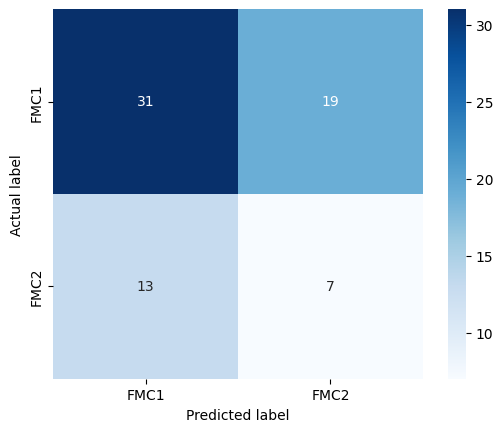

In [19]:
# Confusion Matrix
confusionMatrix = confusion_matrix(testingLabelsF, predict)
labels = ['FMC1', 'FMC2']

sb.heatmap(confusionMatrix, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')


Text(77.92222222222227, 0.5, 'Actual label')

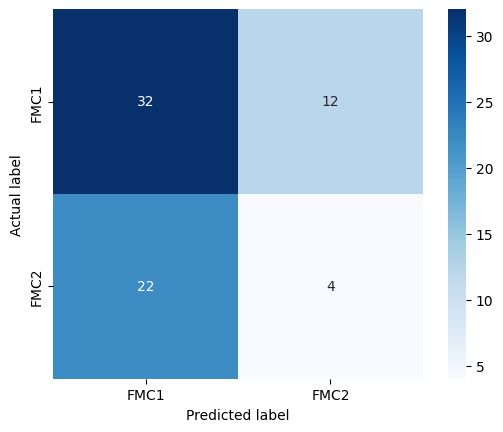

In [20]:
# Confusion Matrix
confusionMatrix2 = confusion_matrix(sampledTestingLabelsF, predict2)
labels = ['FMC1', 'FMC2']

sb.heatmap(confusionMatrix2, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Text(77.92222222222227, 0.5, 'Actual label')

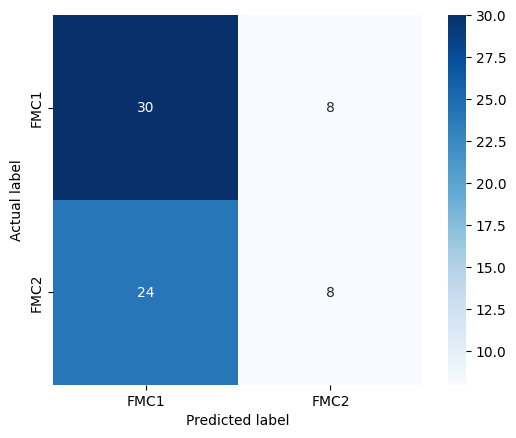

In [21]:
# Confusion Matrix
confusionMatrix3 = confusion_matrix(tsneTestingLabelsF, predict3)
labels = ['FMC1', 'FMC2']

sb.heatmap(confusionMatrix3, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
